## Determining Loan Creditworthiness with Machine learning

## Problem Statement
Dream Housing Finance Company offers various home loans and operates in urban, semi-urban, and rural areas. Customers first apply for a home loan, after which the company assesses their eligibility. To streamline this process, the company aims to automate loan eligibility checks in real time based on information provided in an online application form. Key details include gender, marital status, education, number of dependents, income, loan amount, and credit history. The goal is to identify customer segments that qualify for loans so that the company can effectively target these potential borrowers. It is a classification problem that determine if a loan will be approved or not.

#### Classification Problem can be:
1. Binary Classification : Predict either of the two classes
2. Multiclass Classification: Classify data into three or more classes

## Hypothesis Generation
Here are some factors that may influence loan approval:

1. **Salary**: Higher income applicants are more likely to be approved for a loan.
2. **Previous History**: Applicants with a good track record of repaying past debts have better chances of approval.
3. **Loan Amount**: Smaller loan amounts typically increase the likelihood of approval.
4. **Loan Term**: Loans with shorter terms and lower amounts are more likely to be approved.
5. **EMI (Equated Monthly Installment)**: Lower monthly payments improve the chances of loan approval.

In [1]:
#importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading dataset
train_df = pd.read_csv('train_ctrUa4K.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#loading test data 
test_data = pd.read_csv('test_lAUu6dG.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#data exploration
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#checking for outliers
numerical_cols = train_df.select_dtypes(include = ['int64','float64'])
def find_outliers_iqr(df):
    #creating an empty dataframe to store outliers
    all_outliers = pd.DataFrame() 
    #looping through each columns
    for column in df.columns:
        Q1 = df[column].quantile(0.25) #1st Quantile
        Q3 = df[column].quantile(0.75) #2nd Quantile
        IQR = Q3-Q1 #InterQuartile Range
        lower_bound = Q1 - 1.5 * (IQR) #lower bound for Outliers
        upper_bound = Q3 + 1.5 * (IQR) #Upper bound for Outliers
        
        #finding outliers based on the IQR bounds
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        #Adding a new column to indicate the orginal column name
        outlier_data['outlier_column'] = column
        
        #Append outliers to all_outliers dataframe
        all_outliers = pd.concat([all_outliers, outlier_data])
    return all_outliers.reset_index(drop=True)
    
#apply function to find outliers in each numerical column
outliers_df = find_outliers_iqr(numerical_cols)
outliers_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,outlier_column
0,12841,10968.0,349.0,360.0,1.0,ApplicantIncome
1,12500,3000.0,320.0,360.0,1.0,ApplicantIncome
2,11500,0.0,286.0,360.0,0.0,ApplicantIncome
3,10750,0.0,312.0,360.0,1.0,ApplicantIncome
4,13650,0.0,NaN,360.0,1.0,ApplicantIncome
...,...,...,...,...,...,...
279,3087,2210.0,136.0,360.0,0.0,Credit_History
280,2787,1917.0,146.0,360.0,0.0,Credit_History
281,2726,0.0,106.0,360.0,0.0,Credit_History
282,2987,0.0,88.0,360.0,0.0,Credit_History


#### No significant Outliers seen. 

In [9]:
#checking missing values
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#filling missing values for the gender column using Mode
mode_count = train_df['Gender'].mode()[0]
train_df['Gender'] = train_df['Gender'].fillna(mode_count)

In [13]:
#filling in similar values in test data
test_mode_count = test_data['Gender'].mode()[0]
test_data['Gender'] = test_data['Gender'].fillna(mode_count)

In [14]:
train_df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [15]:
dependents_mode_count = train_df['Dependents'].mode()[0]
train_df['Dependents'] = train_df['Dependents'].fillna(dependents_mode_count)

In [16]:
test_dependent_count = test_data['Dependents'].mode()[0]
test_data['Dependents'] = test_data['Dependents'].fillna(test_dependent_count)

In [17]:
#filling mean as missing value for the loan amount for the train data
mean_loan_amount = train_df['LoanAmount'].mean()
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(mean_loan_amount)

In [18]:
#filling missing values for the test data 
test_mean_loan_amount = test_data['LoanAmount'].mean()
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(test_mean_loan_amount)

In [19]:
#filling missing values for the Self employed column column
mode_employed = train_df['Self_Employed'].mode()[0]
train_df['Self_Employed'] = train_df['Self_Employed'].fillna(mode_employed)

In [20]:
#filling missing values for test self employed data
test_mode_employed = test_data['Self_Employed'].mode()[0]
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(test_mode_employed)

In [21]:
#filling missing values for loan amount 
mean_amount = train_df['LoanAmount'].mean()
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(mean_amount)

In [22]:
#filling missing values for test loan amount 
test_mean_amount = test_data['LoanAmount'].mean()
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(test_mean_amount)

In [23]:
#filling missing values for loan amount term
mean_loan_term = train_df['Loan_Amount_Term'].mean()
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(mean_loan_term)

In [24]:
#filling missing values for test_loan amount term
test_mean_loan_term = test_data['Loan_Amount_Term'].mean()
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(test_mean_loan_term)

In [25]:
#filling missing values for credit history
mean_credit_history = train_df['Credit_History'].mean()
train_df['Credit_History'] = train_df['Credit_History'].fillna(mean_credit_history)

In [28]:
#filling missing values for test data credit history
test_mean_credit_history = test_data['Credit_History'].mean()
test_data['Credit_History'] = test_data['Credit_History'].fillna(test_mean_credit_history)

In [31]:
#filling values for married column
train_df['Married'] = train_df['Married'].fillna( train_df['Married'].dropna().mode().values[0])

In [32]:
test_data['Married'] = test_data['Married'].fillna( test_data['Married'].dropna().mode().values[0])

In [33]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
train_df['Self_Employed'].head()

0    0
1    0
2    1
3    0
4    0
Name: Self_Employed, dtype: int32

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(5), int64(1), object(3)
memory usage: 50.5+ KB


In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int32  
 2   Married            367 non-null    int32  
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    int32  
 5   Self_Employed      367 non-null    int32  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int32(4), int64(2), object(3)
memory usage: 28.8+ KB


## Exploratory Data Analysis
This will be split into 2; Univariate and Bivariate Analysis

### For Univariate Analysis, the individual columns will be checked to understand the distribution, etc

In [54]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1


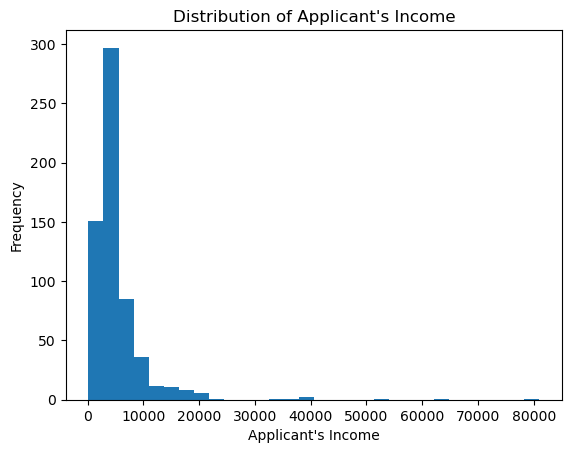

In [55]:
#checking Applicant Income Distribution
plt.hist(x=train_df['ApplicantIncome'], bins = 30)
plt.xlabel('Applicant\'s Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant\'s Income'); #Most of the applicants earn between 0 and 20,000

In [27]:
#checking Gender Population
sns.countplot(train_df['Gender'], data = train_df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count'); #More men apply for loan than women

TypeError: countplot() got multiple values for argument 'data'

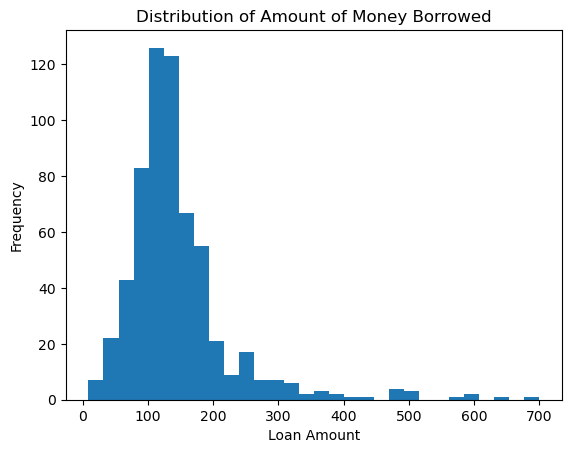

In [56]:
#checking how much most of the applicant borrow
plt.hist(x=train_df['LoanAmount'], bins = 30)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount of Money Borrowed'); #Most people borrow from 100 - 300 with highest amount being 150 -180

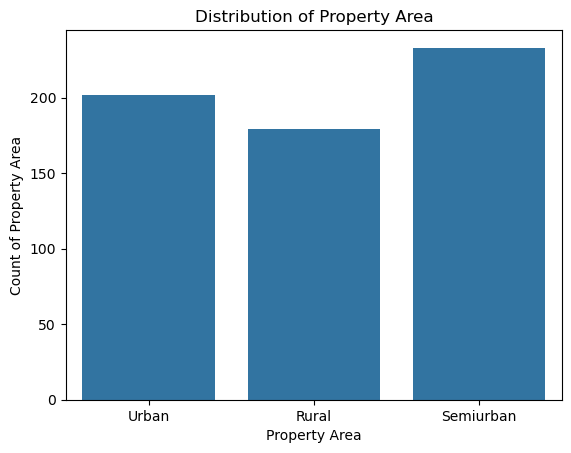

In [57]:
#checking where most people borrow from
sns.countplot(x=train_df['Property_Area'], data = train_df)
plt.xlabel('Property Area')
plt.ylabel('Count of Property Area')
plt.title('Distribution of Property Area');

### Bivariate Analysis
WE analyze more than one variable here in order to make reasonable insights

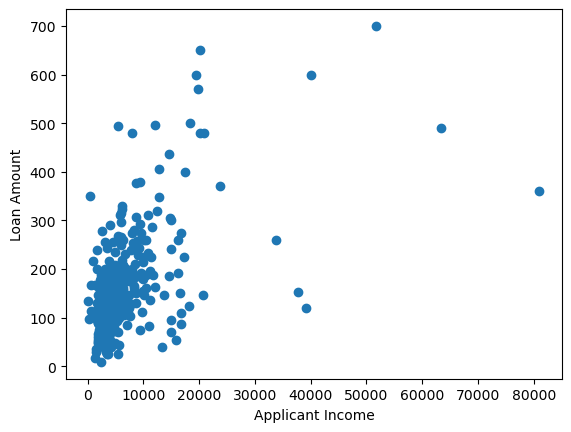

In [58]:
#checking if applicant income have an effect on the loan amount borrowed
plt.scatter(x=train_df['ApplicantIncome'], y = train_df['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount');

#### There is a mild correlation between between Applicant's income and the amount loaned

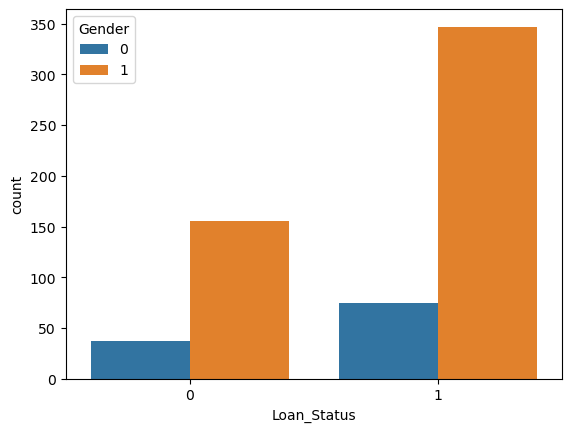

In [59]:
#checking to see if more loan was approved for men than women 
sns.countplot(hue='Gender', x = 'Loan_Status', data = train_df); 
#more men were granted loan than women but this could also be because they applied more

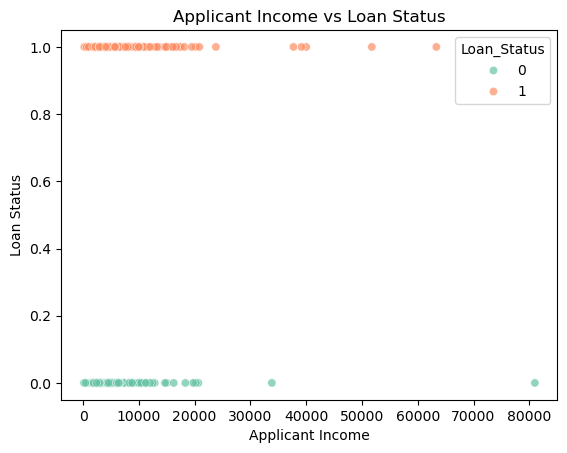

In [60]:
#checking Applicant Income and Loan status
# Scatter plot for Applicant Income and Loan Status
sns.scatterplot(x='ApplicantIncome', y='Loan_Status', data=train_df, hue='Loan_Status', palette='Set2', alpha=0.7)
plt.title('Applicant Income vs Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Status');

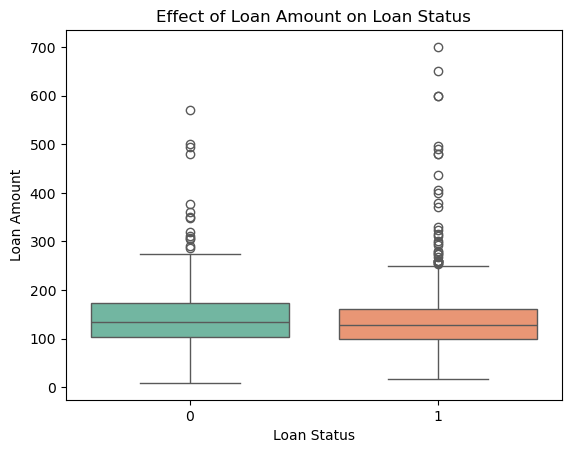

In [61]:
# Boxplot for Loan Amount and Loan Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_df, palette='Set2')
plt.title('Effect of Loan Amount on Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount');

#### A lot of smaller loans were approved however loans upto 700 were also given showing smaller loan amount requested doesnt neccesarily have bearing on if loan status was approved or not.

Text(0, 0.5, 'Applicant Income')

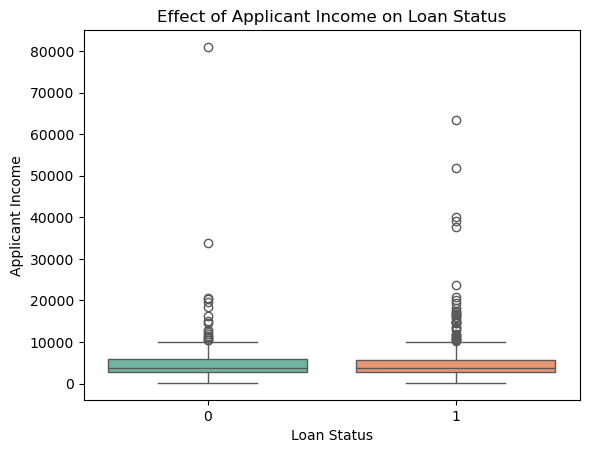

In [62]:
# Boxplot for Applicant Income and Loan Status
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train_df, palette='Set2')
plt.title('Effect of Applicant Income on Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')

#### Most people that got approved loans typically earn between 0 and 15000. data aggregation was also seen between 10000 to 20000 with outliers upto 65000 which is expected becase the more you earn the likelihood of your loan getting approved. In the same vein, most people that their loans were rejected also earned same with the outlier being someone earning 80,000. This means that there are other factors affecting loan approval

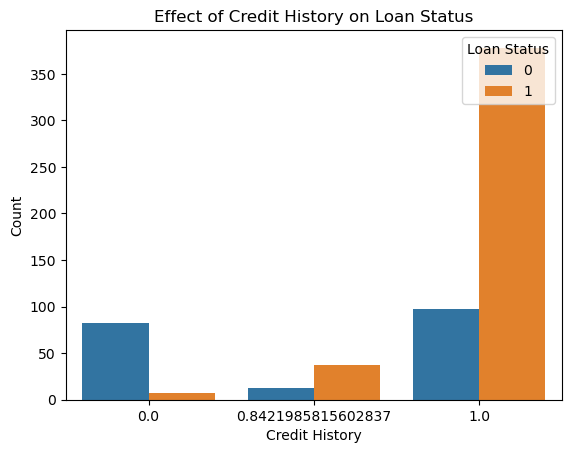

In [63]:
#checking if Credit history has an effect on the loan status
sns.countplot(x='Credit_History', hue = 'Loan_Status', data = train_df)
plt.title('Effect of Credit History on Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right');
#people with low credit history rarely get approval 

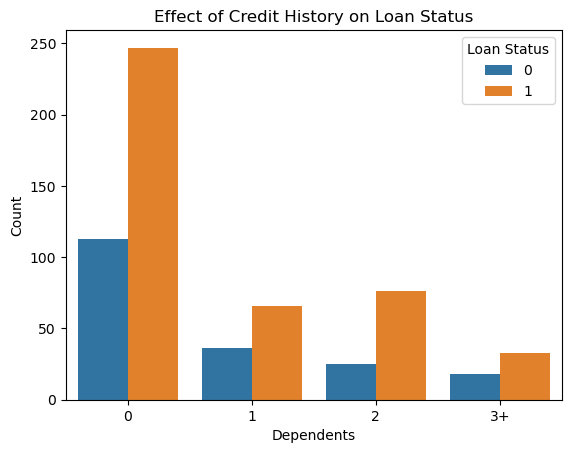

In [64]:
#checking if Dependents has an effect on the loan status
sns.countplot(x='Dependents', hue = 'Loan_Status', data = train_df)
plt.title('Effect of Credit History on Loan Status')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right');

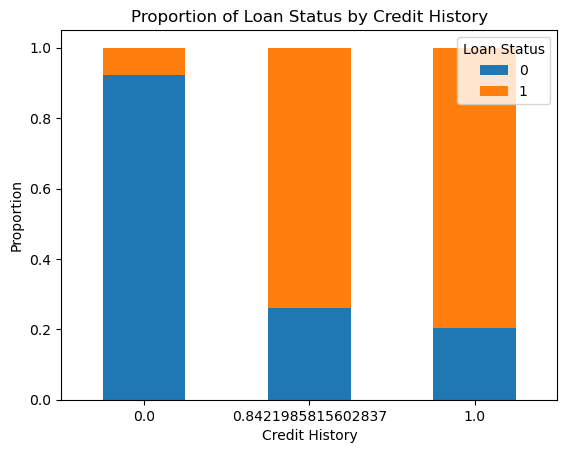

In [65]:
#Using proportion data to visualize credit history and loan status 
proportion_data = train_df.groupby(['Credit_History', 'Loan_Status']).size().unstack(fill_value=0)
proportion_data = proportion_data.div(proportion_data.sum(axis=1), axis=0)  # Normalize to get proportions

# Plotting
proportion_data.plot(kind='bar', stacked=True)
plt.title('Proportion of Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Proportion')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()


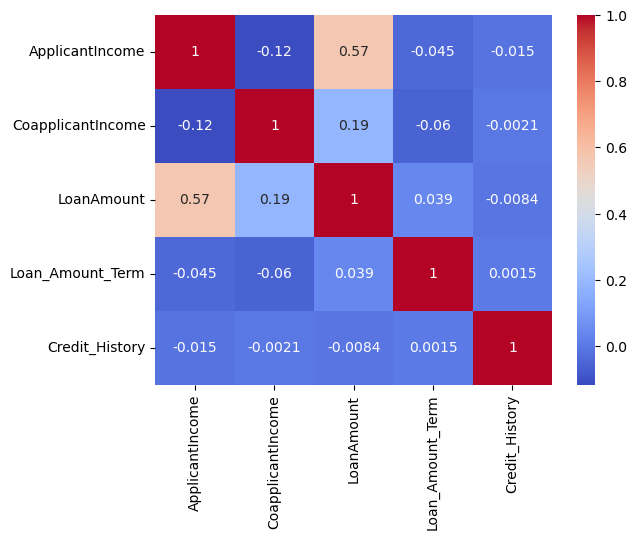

In [66]:
corr_matrix = numerical_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');

## Model Building and Evaluation

Seeing as this is a classification problem in order to assess if a loan will be approved or not, a logistic regression model, Gradient Boost Model, XG Boost and K Nearest Neighbors will be used.

For feature engineering and while going by our hypothesis, we need to figure out Equated Monthly Assesment as part of features. Since this isn't part of our initial variables, it will be determined

In [67]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [69]:
def feature_engineering(data):
    
    
    # Creating new features
    
    
    data['total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
    data['DTI'] = data['LoanAmount'] / data['total_income']
    data['Monthly_Debt_Load'] = data['LoanAmount'] / data['Loan_Amount_Term']
    data['ApplicantIncomelog'] = np.log(data['ApplicantIncome'] + 1)
    data['LoanAmountlog'] = np.log(data['LoanAmount'] + 1)
    data['Loan_Amount_Termlog'] = np.log(data['Loan_Amount_Term'] + 1)
    data['total_incomelog'] = np.log(data['total_income'] + 1)
    
    # Example calculation
    
    return data


In [70]:
# Apply feature engineering to the training dataset
train_processed = feature_engineering(train_df)

# Apply the same feature engineering to the test dataset
test_processed = feature_engineering(test_data)


In [71]:
cols_to_drop=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','total_income']
train_processed = train_processed.drop(columns = cols_to_drop)

In [72]:
cols_to_drop=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','total_income']
test_processed = test_processed.drop(columns = cols_to_drop)

In [73]:
test_processed

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,DTI,Monthly_Debt_Load,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total_incomelog
0,1,1,0,1,0,1.000000,Urban,0.019231,0.305556,8.651899,4.709530,5.888878,8.651899
1,1,1,1,1,0,1.000000,Urban,0.027535,0.350000,8.031710,4.844187,5.888878,8.428799
2,1,1,2,1,0,1.000000,Urban,0.030588,0.577778,8.517393,5.342334,5.888878,8.824825
3,1,1,2,1,0,0.825444,Urban,0.020467,0.277778,7.758333,4.615121,5.888878,8.494334
4,1,0,0,0,0,1.000000,Urban,0.023810,0.216667,8.094684,4.369448,5.888878,8.094684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3+,0,1,1.000000,Urban,0.019530,0.313889,8.296547,4.736198,5.888878,8.663369
363,1,1,0,1,0,1.000000,Urban,0.023629,0.319444,8.333030,4.753590,5.888878,8.490438
364,1,0,0,1,0,0.825444,Semiurban,0.024032,0.350000,8.086718,4.844187,5.888878,8.564840
365,1,1,0,1,0,1.000000,Rural,0.021372,0.438889,8.517393,5.068904,5.888878,8.908424


In [74]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    int32  
 1   Married              614 non-null    int32  
 2   Dependents           614 non-null    object 
 3   Education            614 non-null    int32  
 4   Self_Employed        614 non-null    int32  
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    object 
 7   Loan_Status          614 non-null    int32  
 8   DTI                  614 non-null    float64
 9   Monthly_Debt_Load    614 non-null    float64
 10  ApplicantIncomelog   614 non-null    float64
 11  LoanAmountlog        614 non-null    float64
 12  Loan_Amount_Termlog  614 non-null    float64
 13  total_incomelog      614 non-null    float64
dtypes: float64(7), int32(5), object(2)
memory usage: 55.3+ KB


In [65]:
test_processed

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,DTI,Monthly_Debt_Load,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,total_incomelog
0,Male,Yes,0,Graduate,No,1.000000,Urban,0.019231,0.305556,8.651899,4.709530,5.888878,8.651899
1,Male,Yes,1,Graduate,No,1.000000,Urban,0.027535,0.350000,8.031710,4.844187,5.888878,8.428799
2,Male,Yes,2,Graduate,No,1.000000,Urban,0.030588,0.577778,8.517393,5.342334,5.888878,8.824825
3,Male,Yes,2,Graduate,No,0.825444,Urban,0.020467,0.277778,7.758333,4.615121,5.888878,8.494334
4,Male,No,0,Not Graduate,No,1.000000,Urban,0.023810,0.216667,8.094684,4.369448,5.888878,8.094684
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,1.000000,Urban,0.019530,0.313889,8.296547,4.736198,5.888878,8.663369
363,Male,Yes,0,Graduate,No,1.000000,Urban,0.023629,0.319444,8.333030,4.753590,5.888878,8.490438
364,Male,No,0,Graduate,No,0.825444,Semiurban,0.024032,0.350000,8.086718,4.844187,5.888878,8.564840
365,Male,Yes,0,Graduate,No,1.000000,Rural,0.021372,0.438889,8.517393,5.068904,5.888878,8.908424


In [75]:
train_processed = pd.get_dummies(train_processed, columns=['Dependents','Property_Area'])
test_processed = pd.get_dummies(test_processed, columns=['Dependents','Property_Area'])

In [78]:
X = train_processed.drop('Loan_Status', axis=1)
y = train_processed['Loan_Status']

In [79]:
# splitting into train and test
from sklearn.model_selection import train_test_split

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [80]:
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix

In [82]:
# train Logistic regression model
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

# make predictions
y_pred = log_reg.predict(X_test)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7967479674796748
              precision    recall  f1-score   support

           0       0.95      0.44      0.60        43
           1       0.77      0.99      0.86        80

    accuracy                           0.80       123
   macro avg       0.86      0.71      0.73       123
weighted avg       0.83      0.80      0.77       123



In [83]:
# train knn model
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

# make predictions
y_pred = knn.predict(X_test)
# evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.77      0.40      0.52        43
           1       0.74      0.94      0.83        80

    accuracy                           0.75       123
   macro avg       0.76      0.67      0.68       123
weighted avg       0.75      0.75      0.72       123



In [84]:
gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)
# make predictions
y_pred = gbr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7723577235772358
              precision    recall  f1-score   support

           0       0.78      0.49      0.60        43
           1       0.77      0.93      0.84        80

    accuracy                           0.77       123
   macro avg       0.77      0.71      0.72       123
weighted avg       0.77      0.77      0.76       123



In [85]:
#SVM 
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7967479674796748
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



In [86]:
# train random forest model
rf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=200)
rf.fit(X_train, y_train)

# make predictions
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.84      0.49      0.62        43
           1       0.78      0.95      0.85        80

    accuracy                           0.79       123
   macro avg       0.81      0.72      0.74       123
weighted avg       0.80      0.79      0.77       123



In [87]:
#train Xgboost model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize XGBClassifier model
xgb = XGBClassifier(max_depth=4, random_state=42, n_estimators=400, learning_rate=0.05)

# Fit the model to the training data (assuming X_train and y_train are already defined)
xgb.fit(X_train, y_train)

# Make predictions on the test data (assuming X_test is already defined)
y_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.71      0.56      0.62        43
           1       0.79      0.88      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.72      0.73       123
weighted avg       0.76      0.76      0.76       123



In [88]:
# train catboost model
cat = CatBoostClassifier(random_state = 42, verbose = False )
cat.fit(X_train, y_train)

# make predictions
y_pred = cat.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.84      0.49      0.62        43
           1       0.78      0.95      0.85        80

    accuracy                           0.79       123
   macro avg       0.81      0.72      0.74       123
weighted avg       0.80      0.79      0.77       123



In [89]:
#Hyperparameter tuning with catboost model 
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold (for classification)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
cv_scores = cross_val_score(cat, X, y, cv=cv, scoring='accuracy')

# Output the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean Cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.80645161 0.82258065 0.82258065 0.80645161 0.81967213 0.80327869
 0.80327869 0.80327869 0.81967213 0.83606557]
Mean Cross-validation score: 0.8143310417768376


In [90]:
#Grid search with cross validation
from sklearn.model_selection import GridSearchCV
param_grid = {
    'iterations': [100, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7]
}
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the search
grid_search.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001400D1DBF70>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 7], 'iterations': [100, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy', verbose=1)

In [91]:
# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))

Best Parameters: {'depth': 3, 'iterations': 100, 'learning_rate': 0.01}
Accuracy: 0.8094462540716613


## Conclusion
After trying and testing different algorithms, the best predictions was given by Catboost Model, with an initial accuracy of 79%. Further tuning and optimization increased it to 80%. Further techniques such as balancing of the dataset with SMOTE, over and undersampling can also be used to improve the model's accuracy